In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def read(fpath, GF=False):
    try:
        with open(fpath) as f:
            flines = f.readlines()
    except:
        return None
    if GF:
        suc_line = flines[-2]
        final_n = suc_line.split("=")[-1]
        final_n = int(final_n)
    flines = flines[:-2]
    len_flines = len(flines)
    n_vals = [flines[i] for i in range(0, len_flines,3)]
    try:
        int(n_vals[-1])
    except:
        n_vals = n_vals[:-1]
    n_vals = [int(num) for num in n_vals]
    avg_vecs = [flines[i] for i in range(1,len_flines,3)]
    max_vecs = [flines[i] for i in range(2,len_flines,3)]
    vec_len = len(avg_vecs[0].split(" ")) - 2
    for i,vec in enumerate(avg_vecs):
        vec = vec.split(" ")[1:vec_len+1]
        avg_vecs[i] = [float(j) for j in vec]
        avg_vecs[i] = sum([avg_vecs[i][j]*2**(-(j+1)) for j in range(vec_len)])
    
    for i,vec in enumerate(max_vecs):
        vec = vec.split(" ")[1:vec_len+1]
        max_vecs[i] = [int(j) for j in vec]
        max_vecs[i] = sum([max_vecs[i][j]*2**(-(j+1)) for j in range(vec_len)])
    if GF:
        n_vals[-1] = final_n
        max_vecs[-1] = 0
        avg_vecs[-1] = 0
    return np.array(n_vals),np.array(max_vecs),np.array(avg_vecs)

In [ ]:
# data = [read(f"hill_climber_test_g_20_{i}.log") for i in range(10)]
# # data = [tup for tup in data if tup is not None]
# data2 = [read(f"GF_test_g_20_{i}.log") for i in range(10)]
data = read("timed_result_0.log")

In [4]:
idx = np.random.permutation(500)[:10]
data_HC = [read(f"results\\exp_retry_g23\\log_{i}.log") for i in idx]
data_GF = [read(f"results\\GF_reg_g23\\log_{i}.log", True) for i in idx]

In [5]:

for nn1 ,nn2 in zip(data_HC,data_GF):
    nn1 = nn1[0]
    nn2 = nn2[0]
    print(nn1[-1], nn2[-1])

2572 2652
2576 2764
2552 2608
2584 2716
2528 2664
2576 2680
2592 2708
2556 2756
2520 2724
2588 2696


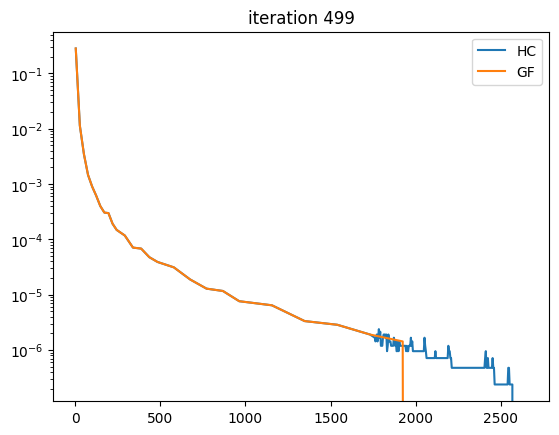

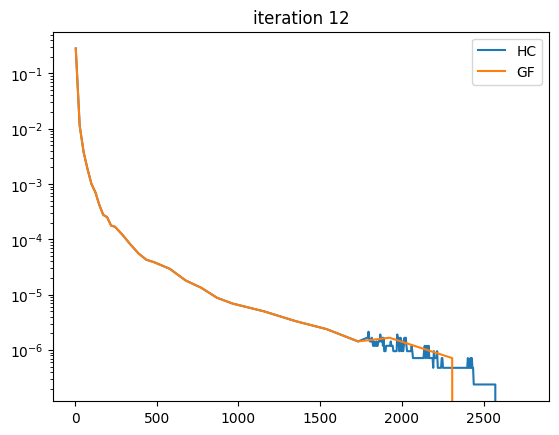

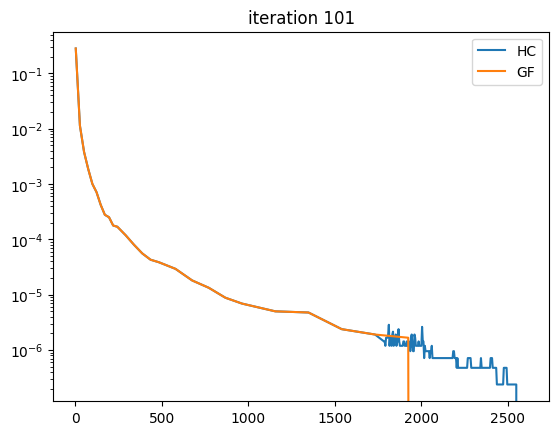

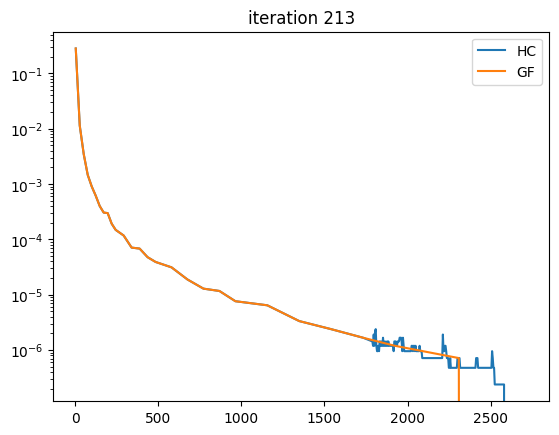

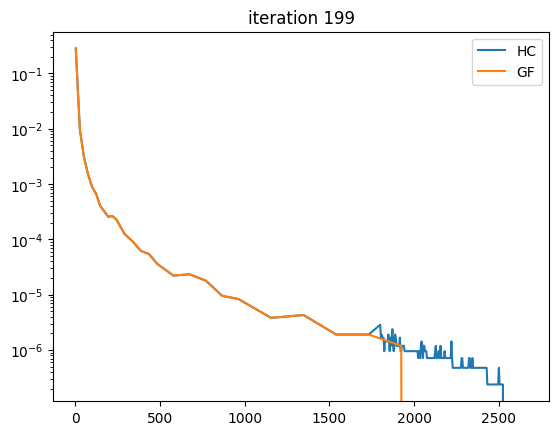

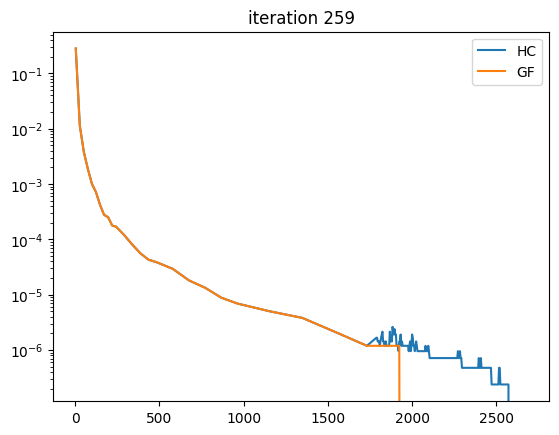

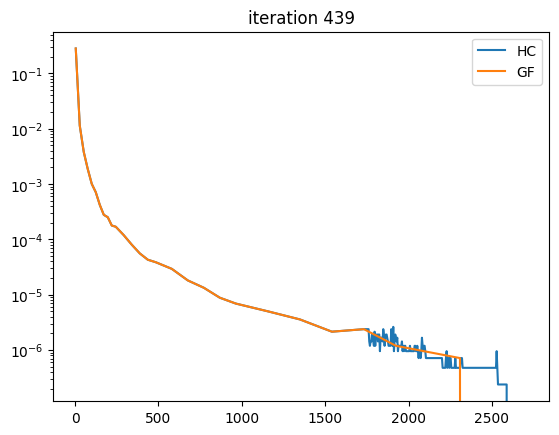

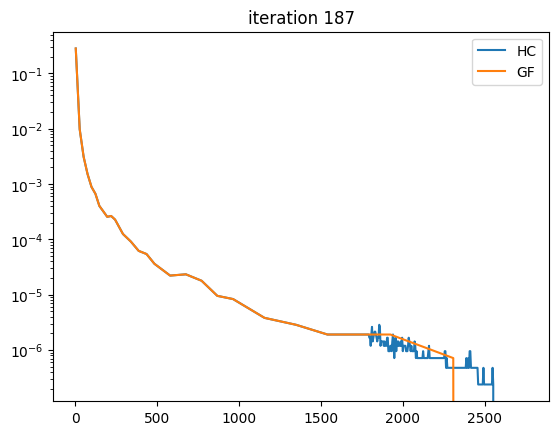

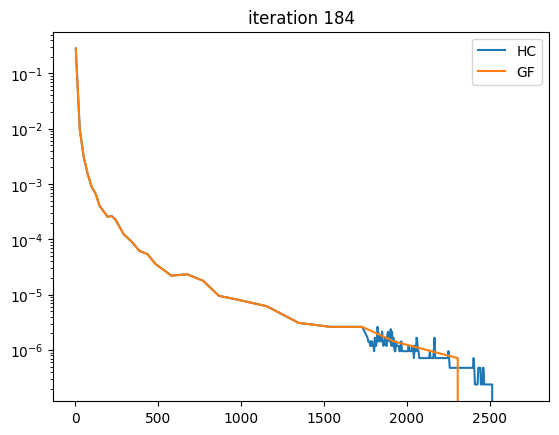

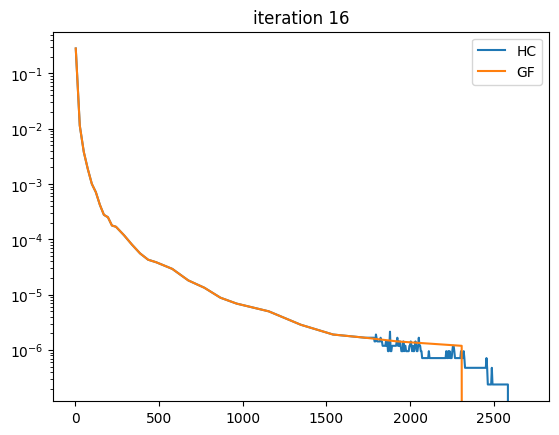

In [6]:

for i in range(10):
    hc = data_HC[i]
    gf = data_GF[i]
    # plt.figure(figsize=(20,20))
    plt.yscale("log")
    plt.plot(hc[0], hc[1])
    plt.plot(gf[0], gf[1])
    plt.title(f"iteration {idx[i]}")
    plt.legend(["HC", "GF"])
    plt.show()

In [7]:
print(data_GF[0])

(array([   4,   28,   52,   76,  100,  124,  148,  172,  196,  220,  244,
        292,  340,  388,  436,  484,  580,  676,  772,  868,  964, 1156,
       1348, 1540, 1732, 1924, 2652]), array([2.82548428e-01, 1.13842487e-02, 3.46398354e-03, 1.46389008e-03,
       9.05036926e-04, 6.16550446e-04, 4.00781631e-04, 3.05175781e-04,
       2.98738480e-04, 1.92165375e-04, 1.48534775e-04, 1.17540359e-04,
       7.10487366e-05, 6.81877136e-05, 4.76837158e-05, 3.91006470e-05,
       3.12328339e-05, 1.88350677e-05, 1.28746033e-05, 1.16825104e-05,
       7.62939453e-06, 6.43730164e-06, 3.33786011e-06, 2.86102295e-06,
       1.90734863e-06, 1.43051147e-06, 0.00000000e+00]), array([2.82548428e-01, 1.01527357e-02, 3.00496157e-03, 1.30572443e-03,
       7.41300583e-04, 4.82736120e-04, 3.31427486e-04, 2.41210193e-04,
       1.96890128e-04, 1.47470576e-04, 1.19500488e-04, 8.00090027e-05,
       5.59820576e-05, 4.29411312e-05, 3.33665752e-05, 2.61994410e-05,
       1.70970723e-05, 1.16740493e-05, 8.651633

In [ ]:

# plt.figure(figsize=(20,20))
# plt.yscale("log")
# for i in range(10): 
#     plt.figure(figsize=(20,20))
#     plt.yscale("log")
#     for tup in [data2[i],data[i]]:
#         plt.plot(tup[0],tup[1])
#     plt.show()

In [ ]:
import os

# Open input file
with open('testing_g20_check_0.log', 'r') as input_file:
    # Read the entire file
    input_text = input_file.read()
    # Split the text at "@@"
    file_contents = input_text.split('@@')
    # Remove leading/trailing whitespace from each section
    file_contents = [content.strip() for content in file_contents]
    
    # Create a directory to store the output files
    if not os.path.exists('output'):
        os.makedirs('output')
    
    # Write each section to a separate file in the output directory
    for i, content in enumerate(file_contents):
        filename = os.path.join('output', f'file_{i}.txt')
        with open(filename, 'w') as output_file:
            output_file.write(content)